## Problem Statement

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import binom, poisson, norm, geom, expon, lognorm

In [2]:
#reading the Walmart data 
walmart_data = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')
walmart_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [33]:
# No Missing values present in the given data
walmart_data.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
Marital_check                 0
dtype: int64

In [34]:
# getting the information about the given dataset
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
 10  Marital_check               550068 non-null  object
dtypes: int64(5), object(6)
memory usage: 46.2+ MB


In [35]:
#getting the mean, std. deviation, q1, q2, q3, min, max of the all the numerical data 
walmart_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [6]:
walmart_data['Product_Category'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

In [7]:
# There are 5891 unique customers
walmart_data['User_ID'].nunique()

5891

In [8]:
walmart_data['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [9]:
#Checking the marital status info from data
walmart_data['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [10]:
#Checking the City_Category info from data
walmart_data['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [11]:
walmart_data['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [12]:
def marital_check(data):
    if data == 1:
        return 'Married'
    return 'Single'

walmart_data['Marital_check'] = walmart_data['Marital_Status'].apply(marital_check)
walmart_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Marital_check
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,Single
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,Single
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,Single
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,Single
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,Single


In [101]:
data = walmart_data.drop_duplicates(subset=['User_ID'])

## Univarite Analysis

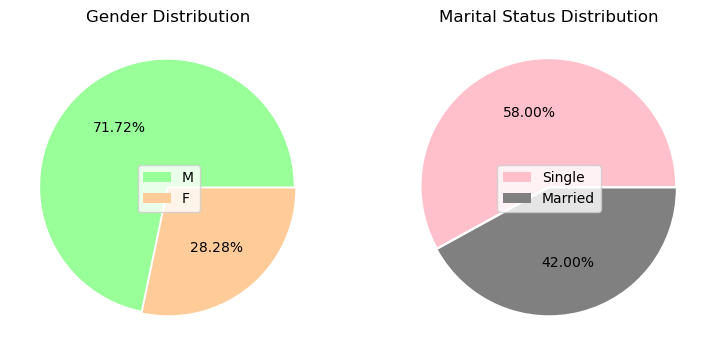

In [168]:
colors = ['#99ff99','#ffcc99']

fig = plt.figure(figsize=(9,12))

plt.subplot(2,2,1)
pie_plot = data['Gender'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', colors = colors, explode = [0.02, 0], legend = True, labeldistance=None)
plt.ylabel('')
plt.title('Gender Distribution')
pie_plot.legend(loc = 'center')

plt.subplot(2,2,2)
pie_plot = data['Marital_check'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', colors = ['Pink', 'Grey'], explode = [0.02, 0], legend = True, labeldistance=None)
plt.ylabel('')
plt.title('Marital Status Distribution')
pie_plot.legend(loc = 'center')
plt.show()



 > We can see there are male customers (71.72%) and
 > We can the count for unmarried customers is a bit high

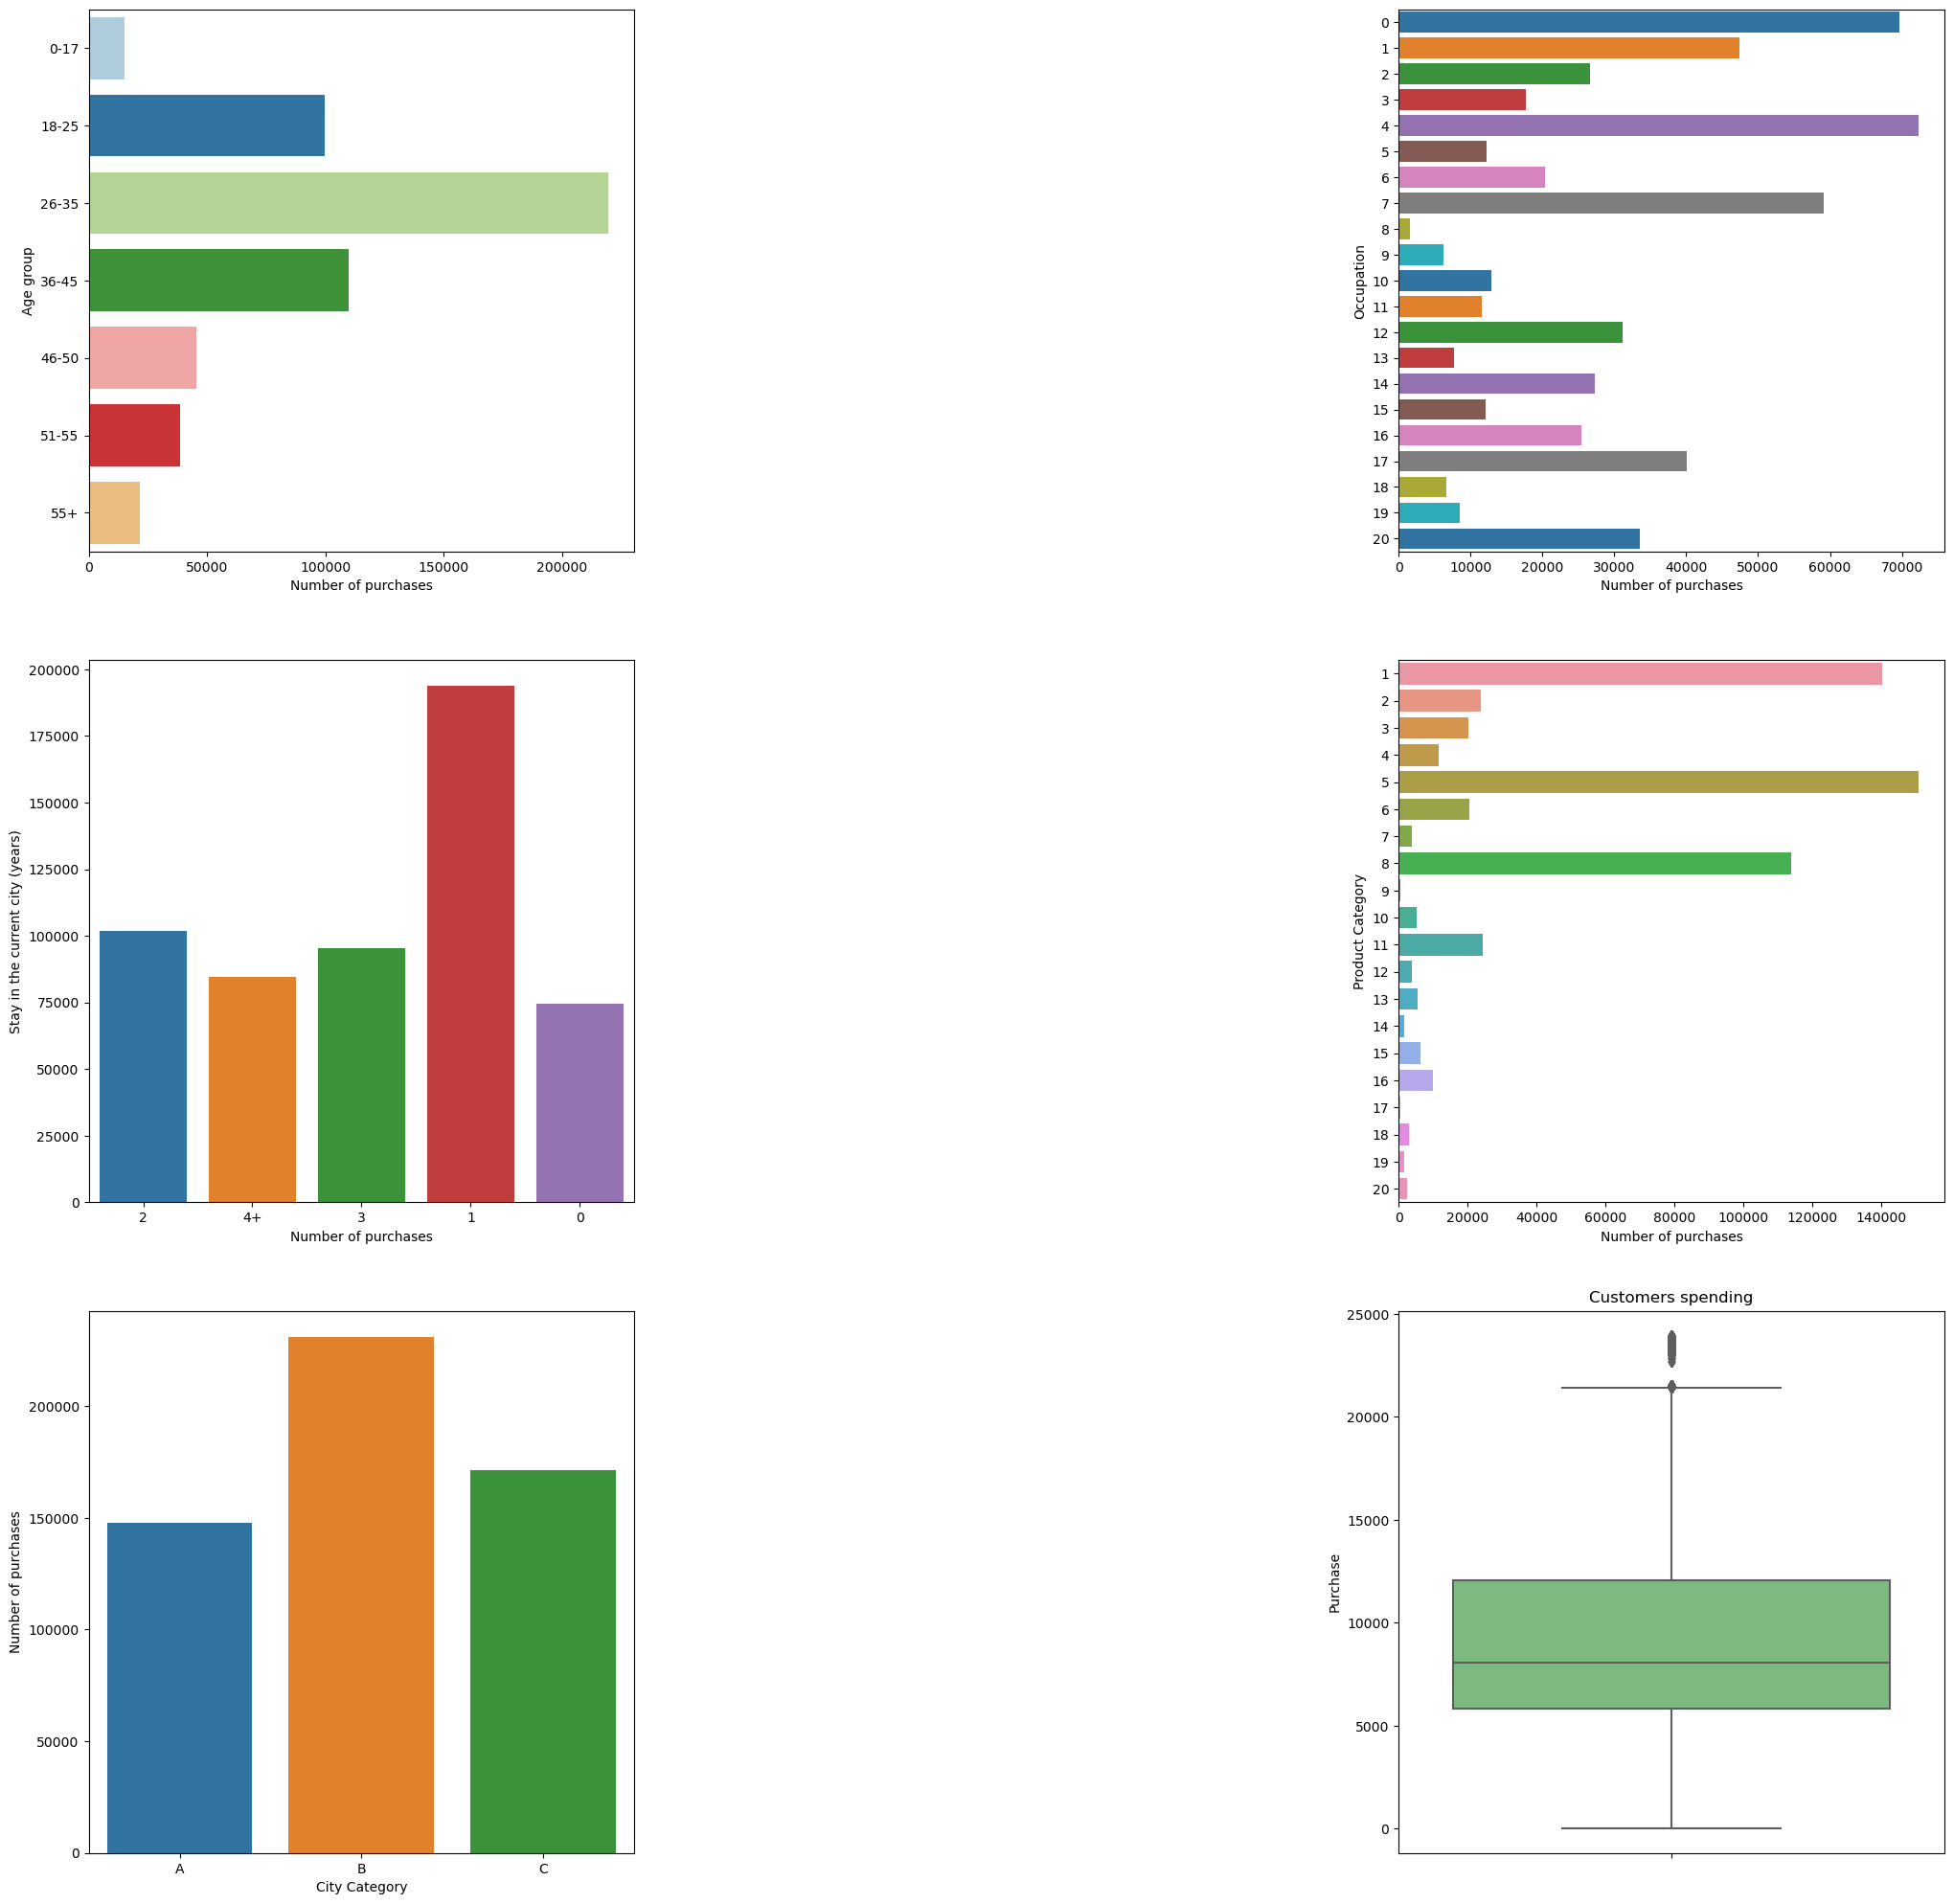

In [300]:
fig = plt.figure(figsize=(25,25))

# Number of customers with respect to the age group
plt.subplot(3,3,1)
sns.countplot(data = walmart_data,
              y = 'Age',
              order = np.sort(walmart_data['Age'].unique()),
              palette = 'Paired')
plt.xlabel('Number of purchases')
plt.ylabel('Age group')

# Number of customers with respect to the occupation
plt.subplot(3,3,3)
sns.countplot(data = walmart_data,
              y = 'Occupation',
              palette = 'tab10')
plt.xlabel('Number of purchases')
plt.ylabel('Occupation')

# Number of customers with respect the number of years stayed in city.
plt.subplot(3,3,4)
sns.countplot(data = walmart_data,
              x = "Stay_In_Current_City_Years")
plt.xlabel('Number of purchases')
plt.ylabel('Stay in the current city (years)')

# The items purchased with respect to thier category
plt.subplot(3,3,6)
sns.countplot(data = walmart_data,
              y = "Product_Category")
plt.xlabel('Number of purchases')
plt.ylabel('Product Category')

# Number of customers according to the city category
plt.subplot(3,3,7)
sns.countplot(data = walmart_data,
              x = 'City_Category',
              palette = 'tab10',
              order = np.sort(walmart_data['City_Category'].unique()))
plt.xlabel('City Category')
plt.ylabel('Number of purchases')

# The amount customers are spending

plt.subplot(3,3,9)
sns.boxplot(data = walmart_data,
            y = 'Purchase',
            palette = 'Greens')
plt.title('Customers spending')

plt.show()

1. There are many purchases between age group 26-53, and significantly more customers in the age groups of 18-25, 36-45
2. The top 5 occupation categories are 4,0,7,1 and 17.
3. People with stay 1 year are visiting the stores more.
4. The products of categories 1, 5 & 8 are purchased more by the customers
5. There are more number of purchases in B category cities

## Bivariate & Multivariate Analysis

In [96]:
walmart_data.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Marital_check
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,Single
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,Single
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,Single


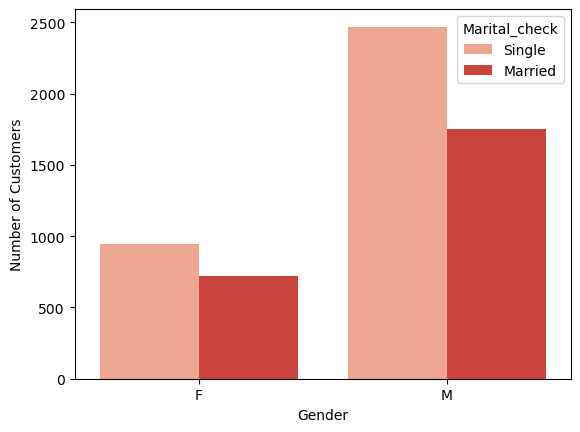

In [199]:
#Number of customers visting the store with respect to their Marital Status & Gender

sns.countplot(data = data,
              x = 'Gender',
              hue = 'Marital_check',
              palette = 'Reds')
plt.ylabel('Number of Customers')
plt.show()

> Single Female & Male customers are more

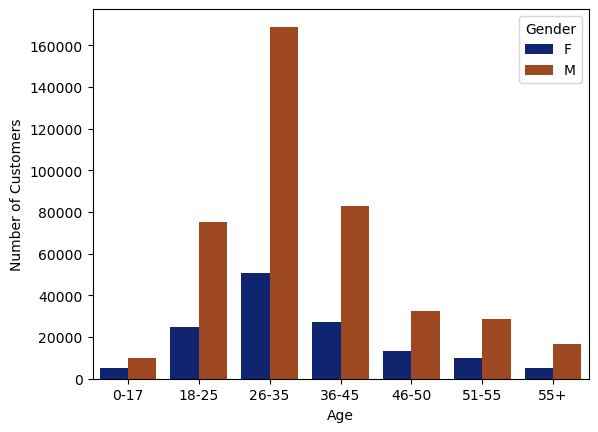

In [200]:
#Number of customers visting the store with respect to their age & Gender

sns.countplot(data = walmart_data,
              x = 'Age',
              hue = 'Gender',
              order = np.sort(walmart_data['Age'].unique()),
              palette = 'dark')
plt.ylabel('Number of Customers')
plt.show()

> Males of Age group 26-35 are purchasing more followed by males of 36-45 and 18-25

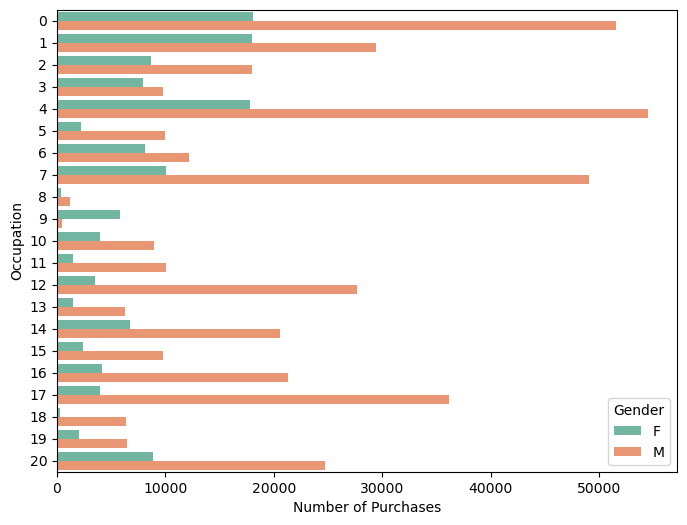

In [201]:
#Number of customers visting the store with respect to their age & Gender

plt.figure(figsize=(8,6))
sns.countplot(data = walmart_data,
              y = 'Occupation',
              hue = 'Gender',
              palette = 'Set2')
plt.xlabel('Number of Purchases')
plt.ylabel('Occupation')
plt.show()

<AxesSubplot:xlabel='Age'>

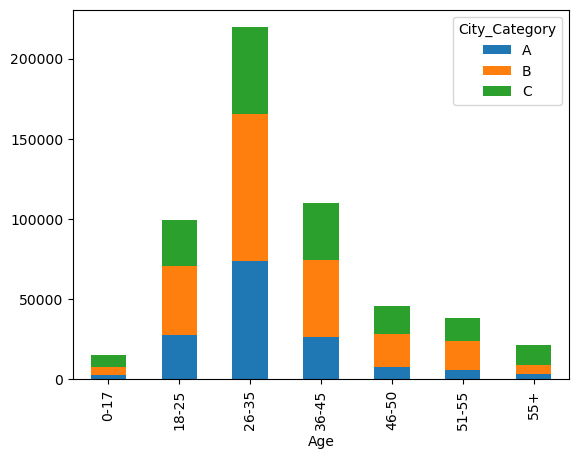

In [135]:
age_product_data = pd.crosstab(index = walmart_data['Age'], columns = walmart_data['City_Category'], normalize = False, margins = False)
age_product_data.plot(kind="bar",stacked=True)

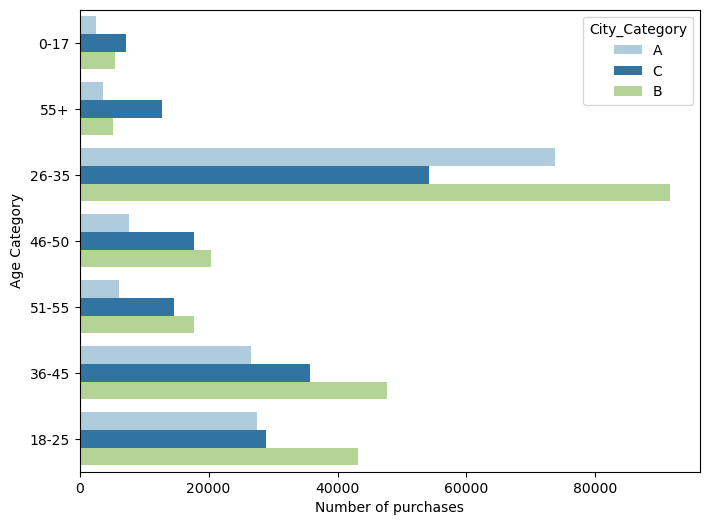

In [202]:
#Number of customers visting the store with respect to their age & city category

plt.figure(figsize=(8,6))
sns.countplot(data = walmart_data,
              y = 'Age',
              hue = 'City_Category',
              palette = 'Paired')
plt.xlabel('Number of purchases')
plt.ylabel('Age Category')
plt.show()

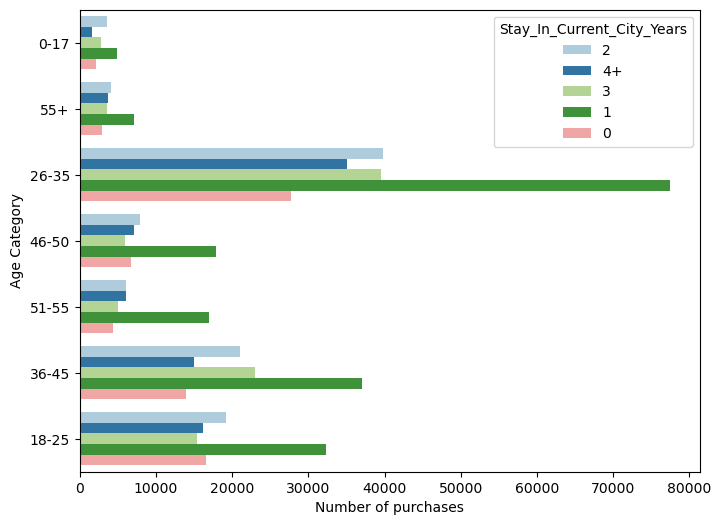

In [141]:
#Number of customers visting the store with respect to their age & city category

plt.figure(figsize=(8,6))
sns.countplot(data = walmart_data,
              y = 'Age',
              hue = 'Stay_In_Current_City_Years',
              palette = 'Paired')
plt.xlabel('Number of purchases')
plt.ylabel('Age Category')
plt.show()

<AxesSubplot:xlabel='Purchase', ylabel='Gender'>

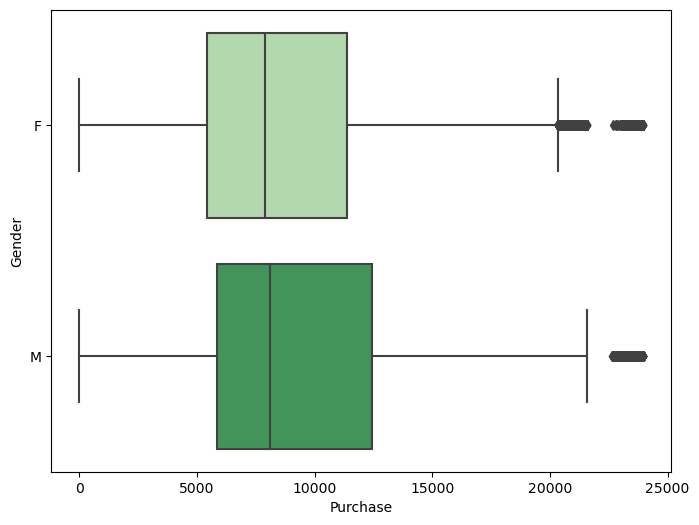

In [204]:
#Boxplot with respect to the gender, we can see some outliers.
plt.figure(figsize = (8,6))
sns.boxplot(data = walmart_data,
            x = 'Purchase',
            y = 'Gender',
            palette = 'Greens')

<AxesSubplot:xlabel='Purchase', ylabel='Marital_check'>

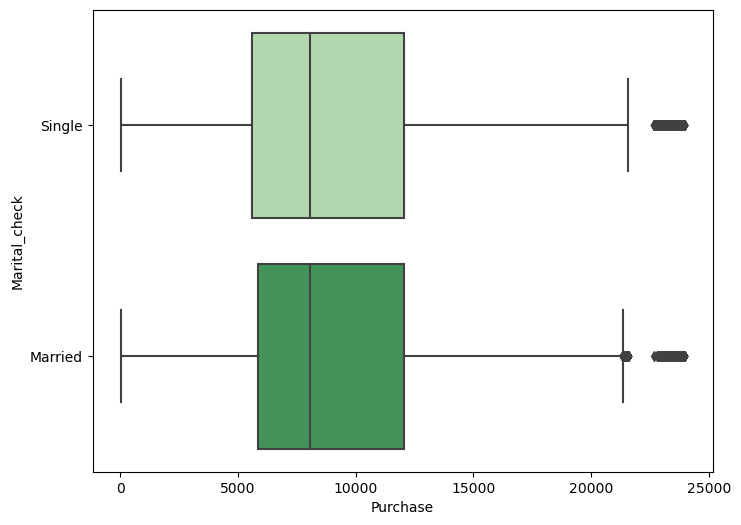

In [205]:
#Boxplot with respect to the Marital Check, we can see some outliers.
plt.figure(figsize = (8,6))
sns.boxplot(data = walmart_data,
            x = 'Purchase',
            y = 'Marital_check',
            palette = 'Greens')

<AxesSubplot:xlabel='Purchase', ylabel='City_Category'>

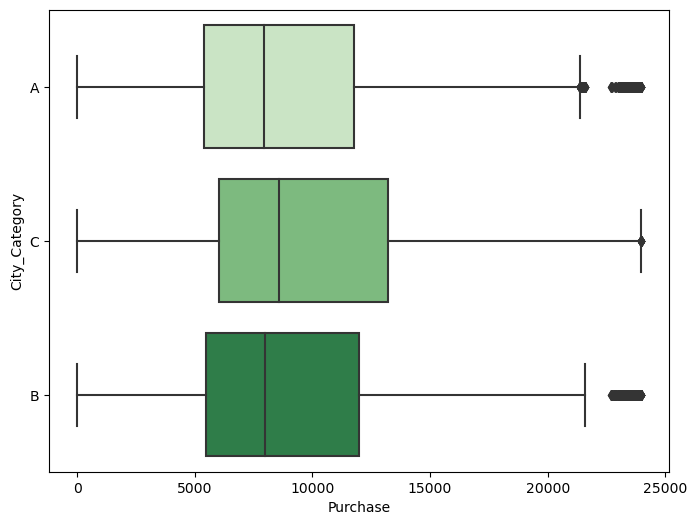

In [206]:
#Boxplot with respect to the city category, we can see some outliers, but no outliers in city c
plt.figure(figsize = (8,6))
sns.boxplot(data = walmart_data,
            x = 'Purchase',
            y = 'City_Category',
            palette = 'Greens')

<AxesSubplot:xlabel='Purchase', ylabel='Stay_In_Current_City_Years'>

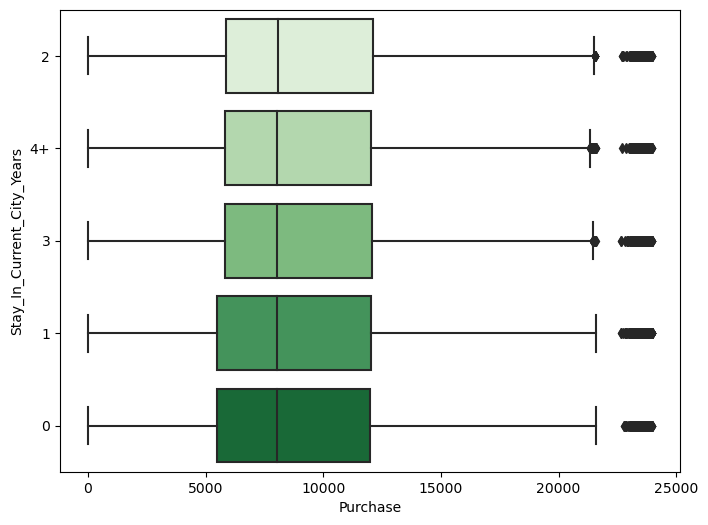

In [210]:
#Boxplot with respect to the city category, we can see some outliers, but no outliers in city c
plt.figure(figsize = (8,6))
sns.boxplot(data = walmart_data,
            x = 'Purchase',
            y = 'Stay_In_Current_City_Years',
            palette = 'Greens')

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

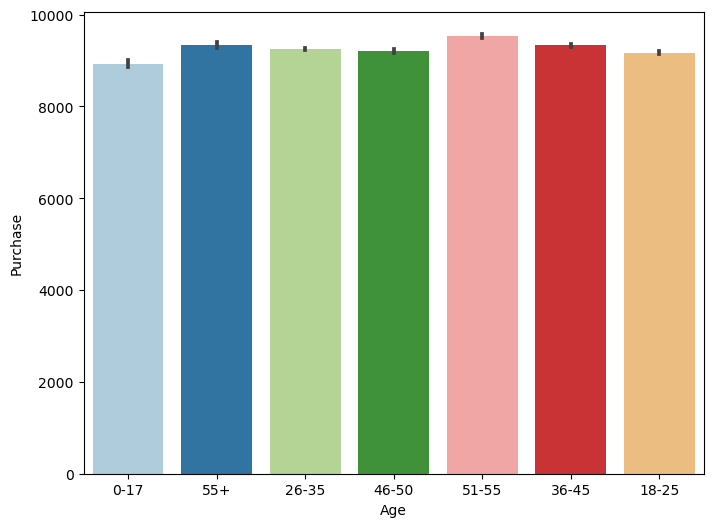

In [215]:
#barplot with respect to the age and purchases.
plt.figure(figsize = (8,6))
sns.barplot(data = walmart_data,
            y = 'Purchase',
            x = 'Age',
            palette = 'Paired')

<AxesSubplot:xlabel='Age', ylabel='Occupation'>

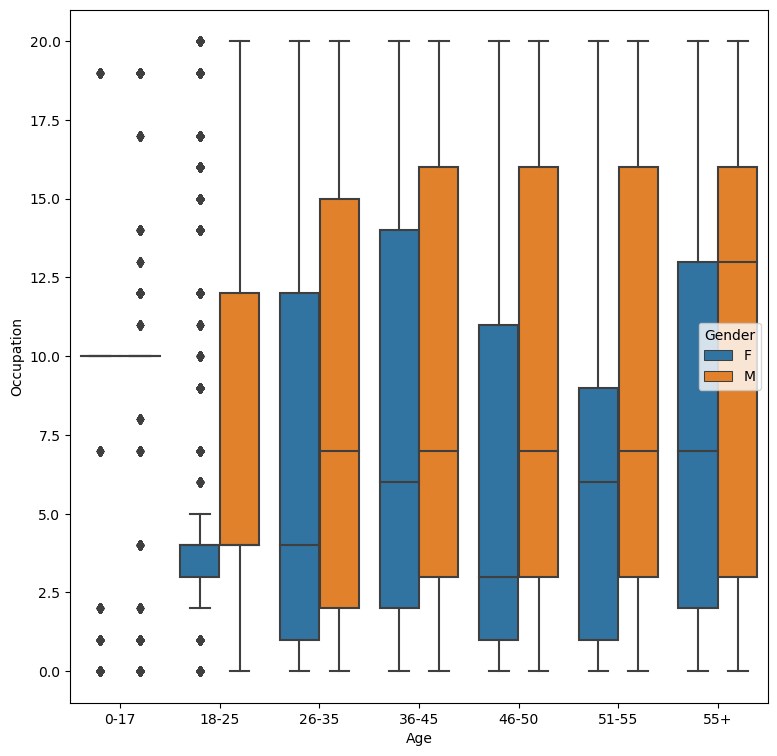

In [254]:
plt.figure(figsize= (9,9))
sns.boxplot(data = walmart_data,
            y = 'Occupation',
            x = 'Age',
            hue = 'Gender',
            order = np.sort(walmart_data['Age'].unique()))

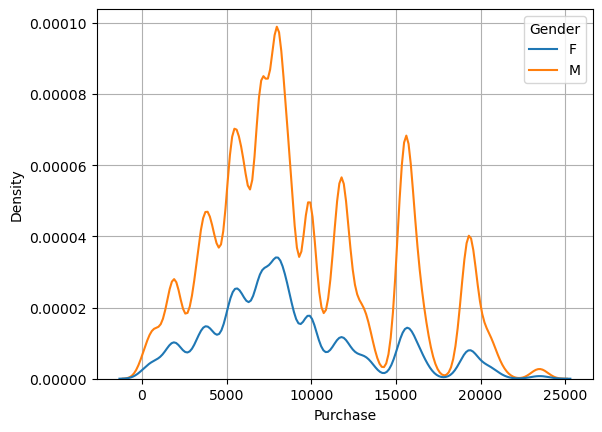

In [287]:
sns.kdeplot(data=walmart_data, x='Purchase', hue='Gender')
plt.grid()

In [233]:
q1 = walmart_data['Purchase'].quantile(0.25)
q3 = walmart_data['Purchase'].quantile(0.75)
iqr = q3 - q1
lowerLimit = q1 - (1.5)*iqr
upperLimit = q3 + (1.5)*iqr
outliers_count = walmart_data[(walmart_data['Purchase'] < lowerLimit) | (walmart_data['Purchase'] > upperLimit)]
len(outliers_count)

2677

In [239]:
walmart_data.groupby(['Gender', 'Marital_check','Age'])['Purchase'].describe()

count         mean          std   min      25%  \
Gender Marital_check Age                                                        
F      Married       18-25    6271.0  7945.948174  4586.043513  12.0  5147.50   
                     26-35   20674.0  8921.716649  4822.206140  12.0  5469.00   
                     36-45   10521.0  8855.021766  4860.100007  12.0  5455.00   
                     46-50   10033.0  8867.388817  4824.800743  12.0  5466.00   
                     51-55    6314.0  8989.091543  4765.963169  12.0  6009.00   
                     55+      3175.0  9106.955591  4744.972379  12.0  6149.00   
       Single        0-17     5083.0  8338.771985  4850.032944  12.0  5243.00   
                     18-25   18357.0  8478.880046  4715.728224  12.0  5315.00   
                     26-35   30078.0  8595.274387  4641.841585  12.0  5422.00   
                     36-45   16649.0  9026.084389  4815.251532  12.0  5854.00   
                     46-50    3166.0  8761.955780  4702.734529  12.0  5823.50   
                     51-55    3580.0  9136.556704  4990.613899  14.0  5963.75   
                     55+      1908.0  8840.765723  4890.995509  24.0  5855.00   
M      Married       18-25   14845.0  9437.455844  5158.864667  12.0  5461.00   
                     26-35   65617.0  9357.223067  5067.380771  12.0  5459.00   
                     36-45   33115.0  9340.040465  5041.044336  12.0  5883.00   
                     46-50   22978.0  9496.846157  5057.350816  12.0  5970.00   
                     51-55   21348.0  9675.385329  5167.327715  12.0  6003.00   
                     55+     10446.0  9252.416715  4985.939559  12.0  5967.00   
       Single        0-17    10019.0  9235.173670  5212.954953  12.0  5372.00   
                     18-25   60187.0  9441.803064  5102.538669  12.0  5478.00   
                     26-35  103218.0  9444.103151  5094.925387  12.0  5853.00   
                     36-45   49728.0  9528.544904  5100.602959  12.0  5901.00   
                     46-50    9524.0  9021.210416  4939.171036  12.0  5479.00   
                     51-55    7259.0  9792.467420  5123.859726  12.0  6093.50   
                     55+      5975.0  9762.989958  5199.618955  12.0  6090.50   

                               50%       75%      max  
Gender Marital_check Age                               
F      Married       18-25  7121.0   9967.00  23936.0  
                     26-35  7940.0  11612.75  23948.0  
                     36-45  7994.0  11464.00  23948.0  
                     46-50  7958.0  11649.00  23920.0  
                     51-55  7971.5  11071.00  23959.0  
                     55+    8090.0  10068.00  23860.0  
       Single        0-17   7824.0  10755.00  23866.0  
                     18-25  7801.0  11028.00  23932.0  
                     26-35  7852.5  10617.75  23955.0  
                     36-45  7977.0  11817.00  23915.0  
                     46-50  7949.5  11385.50  23919.0  
                     51-55  8045.5  11404.00  23869.0  
                     55+    8069.0  10059.25  23899.0  
M      Married       18-25  8131.0  12571.00  23928.0  
                     26-35  8072.0  12228.00  23961.0  
                     36-45  8054.0  12092.50  23949.0  
                     46-50  8118.0  12640.25  23960.0  
                     51-55  8343.0  12930.25  23960.0  
                     55+    8068.0  11898.50  23960.0  
       Single        0-17   8080.0  12121.50  23955.0  
                     18-25  8117.0  12556.50  23958.0  
                     26-35  8087.0  12444.00  23961.0  
                     36-45  8116.0  12801.00  23960.0  
                     46-50  7960.0  11833.00  23928.0  
                     51-55  8575.0  13064.00  23942.0  
                     55+    8625.0  13165.50  23916.0

In [240]:
walmart_data.groupby(['Gender','City_Category'])['Purchase'].describe()

count         mean          std   min     25%  \
Gender City_Category                                                     
F      A               35704.0  8579.708576  4670.230320  12.0  5413.0   
       B               57796.0  8540.677694  4682.803540  12.0  5376.0   
       C               42309.0  9130.107518  4935.788374  12.0  5919.0   
M      A              112016.0  9017.834470  4956.095263  12.0  5399.0   
       B              173377.0  9354.854433  5026.679086  12.0  5826.0   
       C              128866.0  9913.567248  5255.694667  12.0  6071.0   

                         50%       75%      max  
Gender City_Category                             
F      A              7847.0  10728.25  23948.0  
       B              7839.0  10847.00  23959.0  
       C              8077.0  11765.00  23951.0  
M      A              7963.0  11908.00  23961.0  
       B              8065.0  12134.00  23960.0  
       C              8655.0  15161.00  23961.0

In [241]:
walmart_data.groupby(['Gender','Stay_In_Current_City_Years'])['Purchase'].describe()

count         mean          std   min  \
Gender Stay_In_Current_City_Years                                             
F      0                            17063.0  8606.040497  4818.426481  12.0   
       1                            51298.0  8775.052244  4758.820277  12.0   
       2                            24332.0  8740.516357  4765.653324  12.0   
       3                            24520.0  8695.236582  4769.479990  12.0   
       4+                           18596.0  8784.883738  4740.187821  12.0   
M      0                            57335.0  9350.908869  5027.952112  12.0   
       1                           142523.0  9421.145380  5109.942588  12.0   
       2                            77506.0  9502.486091  5115.517017  12.0   
       3                            70765.0  9491.916315  5088.400696  12.0   
       4+                           66130.0  9413.589778  5084.432838  12.0   

                                       25%     50%       75%      max  
Gender Stay_In_Current_City_Years                                      
F      0                           5375.00  7875.0  10996.00  23948.0  
       1                           5452.00  7916.0  11404.75  23959.0  
       2                           5432.00  7927.0  11429.00  23913.0  
       3                           5410.75  7892.0  11424.00  23955.0  
       4+                          5463.00  7952.0  11408.00  23951.0  
M      0                           5863.00  8074.0  12101.00  23960.0  
       1                           5826.00  8094.0  12411.00  23961.0  
       2                           5895.00  8122.0  12752.75  23961.0  
       3                           5893.00  8114.0  12671.00  23961.0  
       4+                          5869.00  8086.0  12268.00  23958.0

In [255]:
walmart_data.groupby(['Gender','Age'])['Occupation'].describe()

count       mean       std  min   25%   50%   75%   max
Gender Age                                                              
F      0-17     5083.0   8.259099  4.180919  0.0  10.0  10.0  10.0  19.0
       18-25   24628.0   5.957650  5.840946  0.0   3.0   4.0   4.0  20.0
       26-35   50752.0   6.496099  6.290501  0.0   1.0   4.0  12.0  20.0
       36-45   27170.0   7.761134  6.596174  0.0   2.0   6.0  14.0  20.0
       46-50   13199.0   6.237821  6.444269  0.0   1.0   3.0  11.0  20.0
       51-55    9894.0   6.754599  6.218845  0.0   1.0   6.0   9.0  20.0
       55+      5083.0   7.278576  5.858080  0.0   2.0   7.0  13.0  20.0
M      0-17    10019.0   9.015670  4.633962  0.0  10.0  10.0  10.0  19.0
       18-25   75032.0   6.991990  5.960160  0.0   4.0   4.0  12.0  20.0
       26-35  168835.0   8.318080  6.755365  0.0   2.0   7.0  15.0  20.0
       36-45   82843.0   9.190336  6.548358  0.0   3.0   7.0  16.0  20.0
       46-50   32502.0   9.442680  6.545706  0.0   3.0   7.0  16.0  20.0
       51-55   28607.0   9.521026  6.673279  0.0   3.0   7.0  16.0  20.0
       55+     16421.0  10.191158  6.365449  0.0   3.0  13.0  16.0  20.0

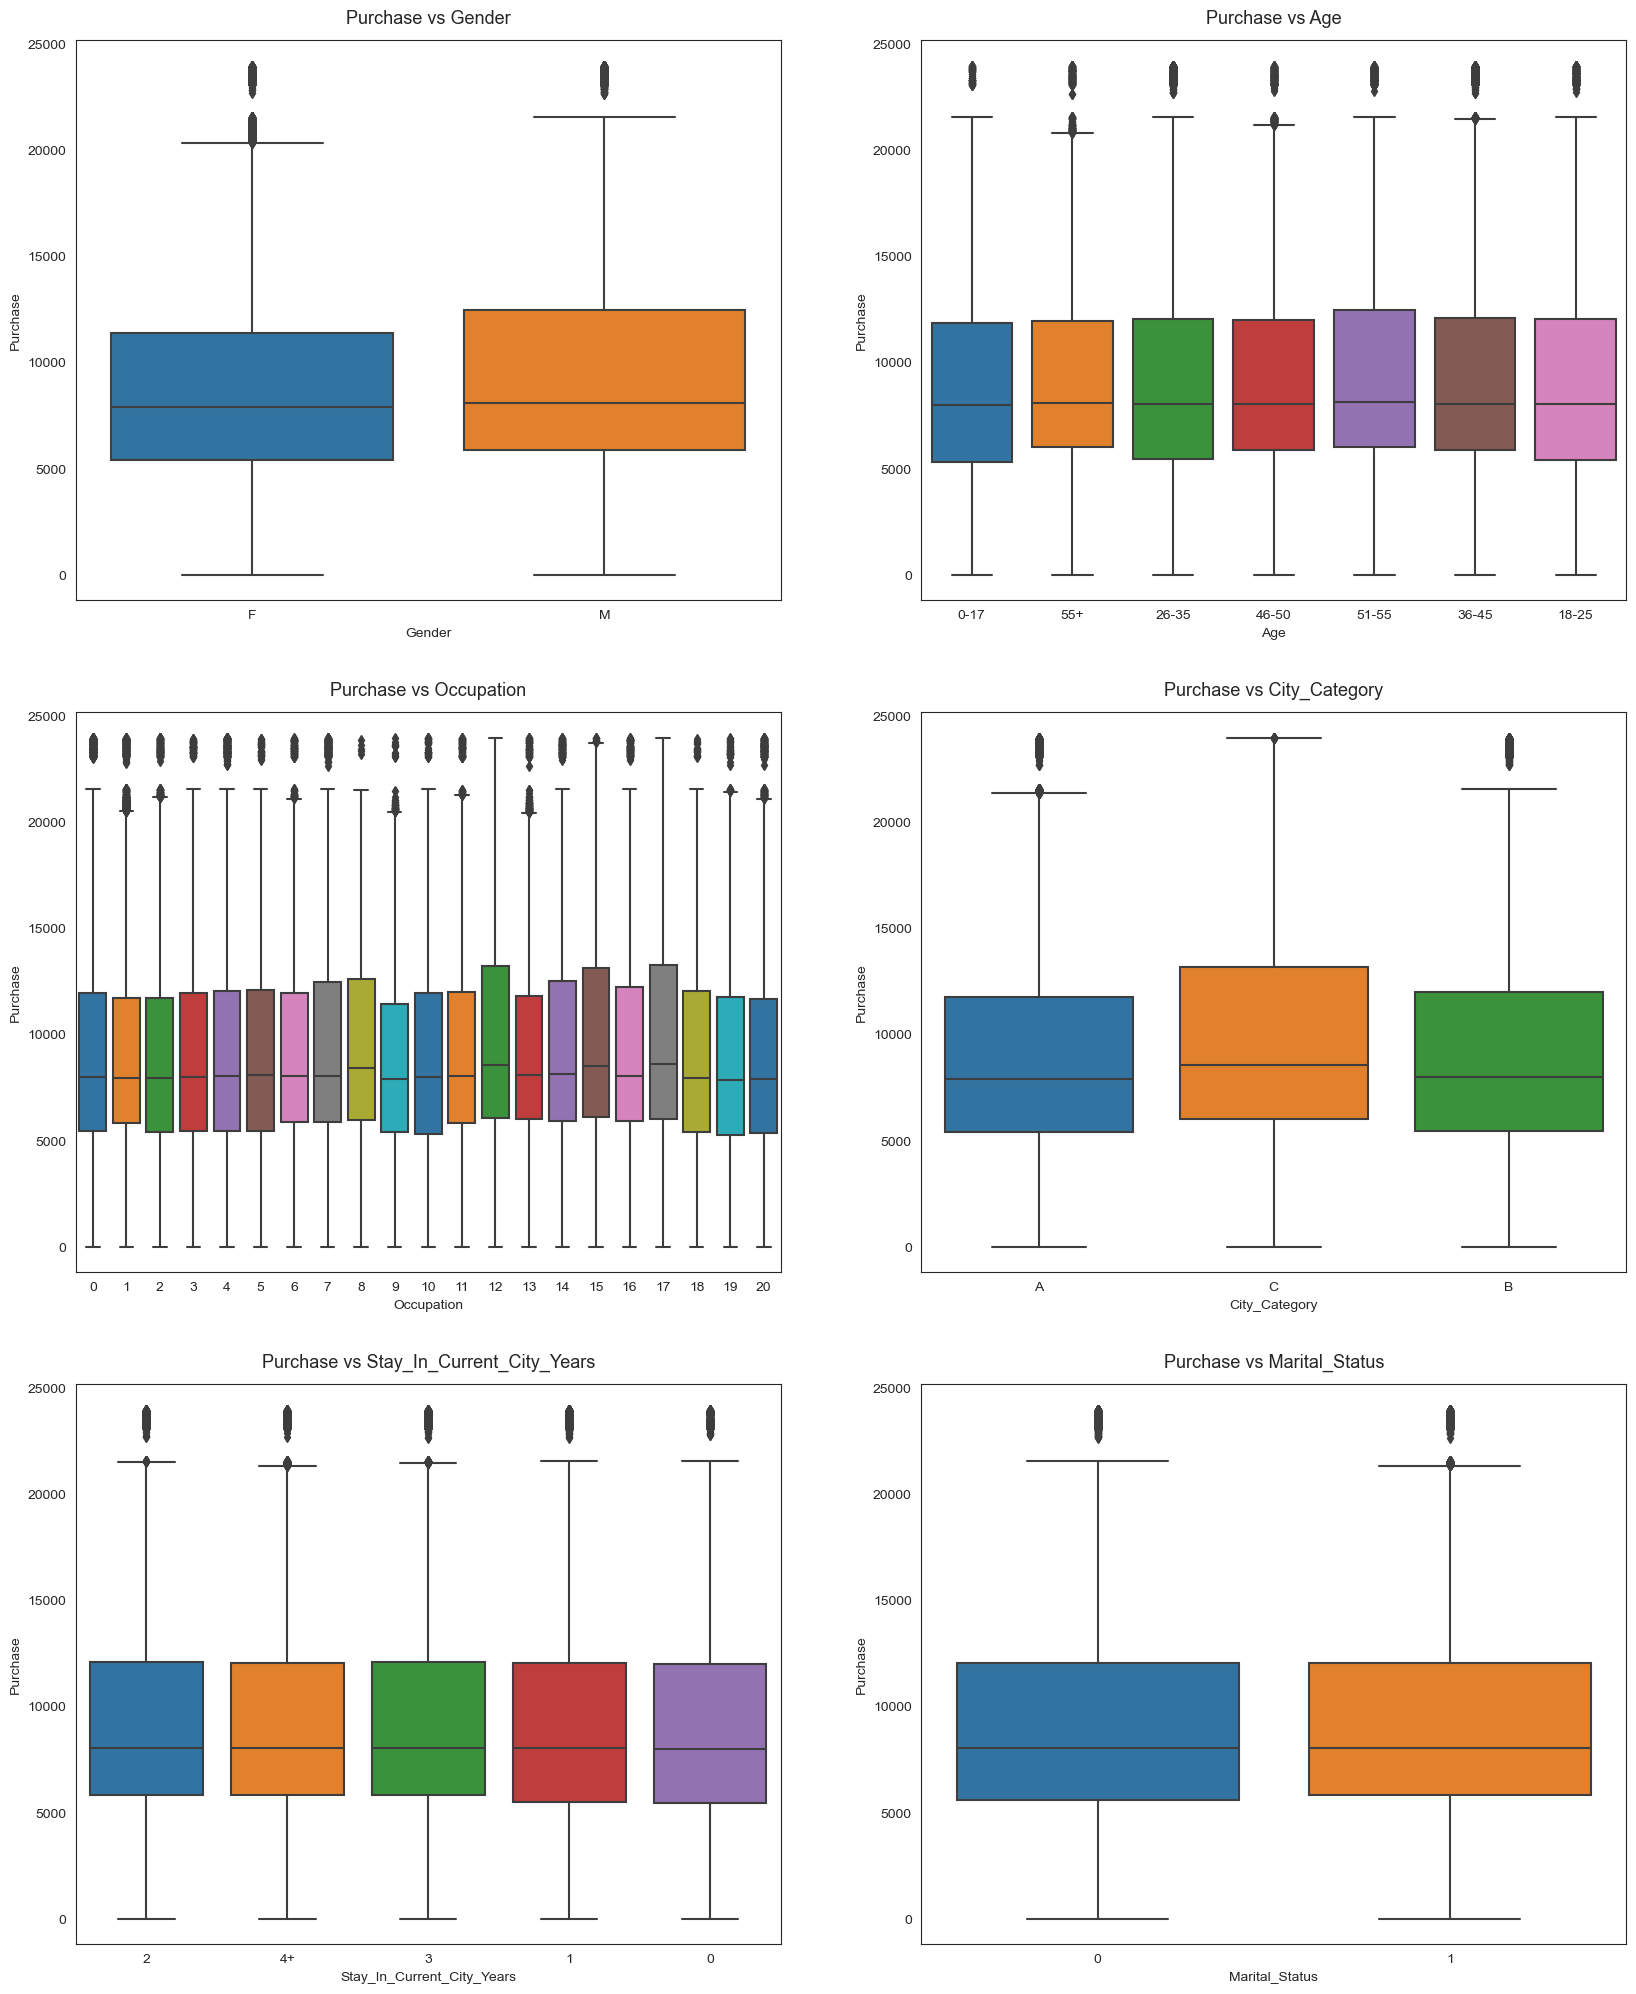

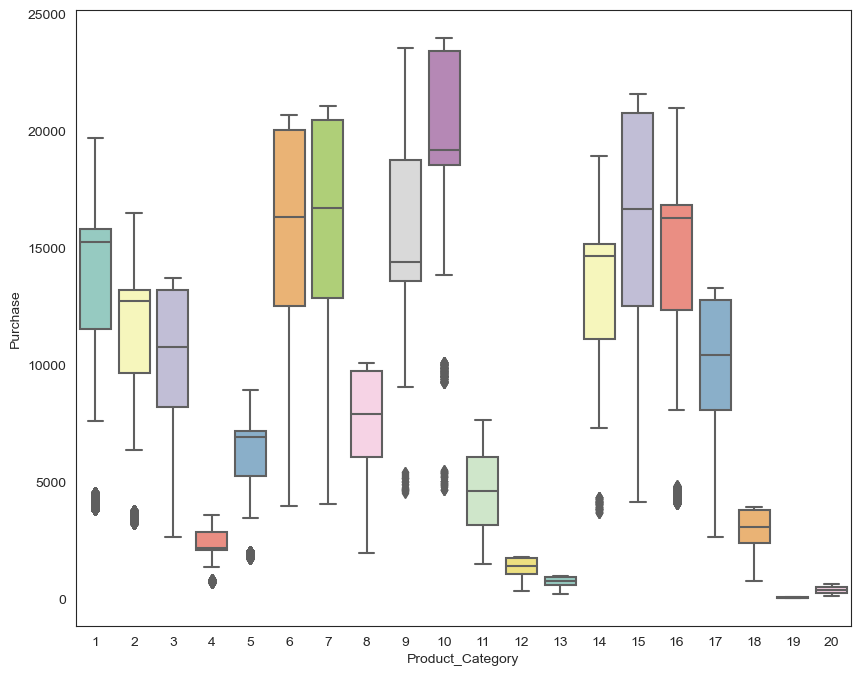

In [361]:
attrs = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
sns.set_style("white")

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row, col], palette='tab10')
        axs[row,col].set_title(f"Purchase vs {attrs[count]}", pad=12, fontsize=13)
        count += 1
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(data=df, y='Purchase', x=attrs[-1], palette='Set3')
plt.show()

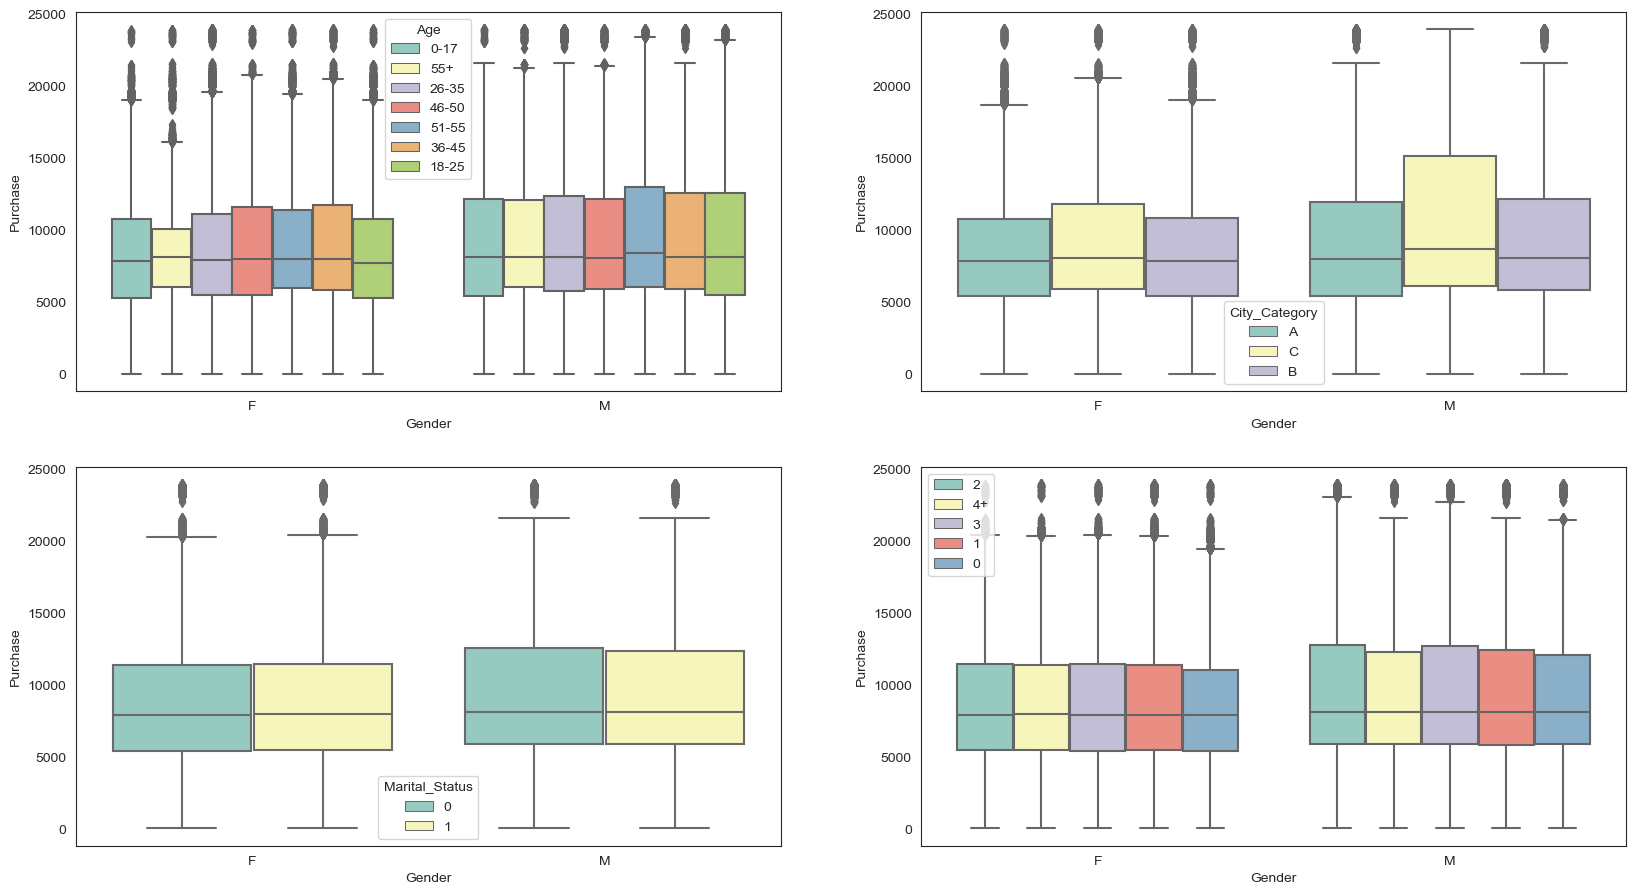

In [303]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', palette='Set3', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette='Set3', ax=axs[0,1])

sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', palette='Set3', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette='Set3', ax=axs[1,1])
axs[1,1].legend(loc='upper left')

plt.show()

## Central Limit Theorem

In [332]:
purchased_data = walmart_data.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
purchased_data = purchased_data.reset_index()
purchased_data

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [333]:
# Gender wise value counts in avg_amt_df
purchased_data['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

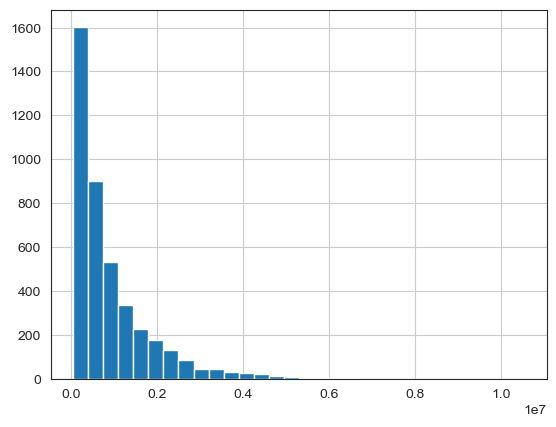

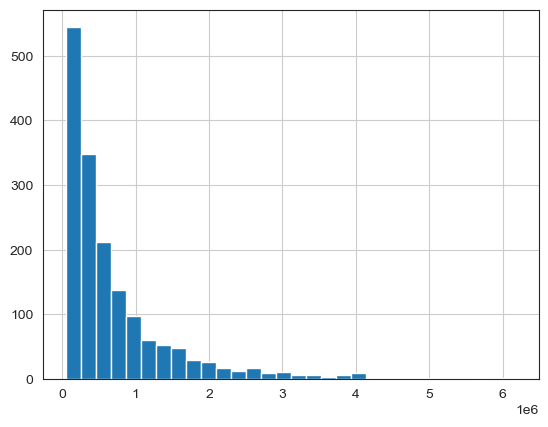

In [334]:
# histogram of average amount spend for each customer - Male & Female
purchased_data[purchased_data['Gender']=='M']['Purchase'].hist(bins=30)
plt.show()

purchased_data[purchased_data['Gender']=='F']['Purchase'].hist(bins=30)
plt.show()

In [336]:
male_avg = purchased_data[purchased_data['Gender']=='M']['Purchase'].mean()
female_avg = purchased_data[purchased_data['Gender']=='F']['Purchase'].mean()

print("Mean amount spend by Male customers: {:.2f}".format(male_avg))
print("Mean amount spend by Female customers: {:.2f}".format(female_avg))

Mean amount spend by Male customers: 925344.40
Mean amount spend by Female customers: 712024.39


In [337]:
male_df = purchased_data[purchased_data['Gender']=='M']
female_df = purchased_data[purchased_data['Gender']=='F']

In [338]:
male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()
    
    male_means.append(male_mean)
    female_means.append(female_mean)

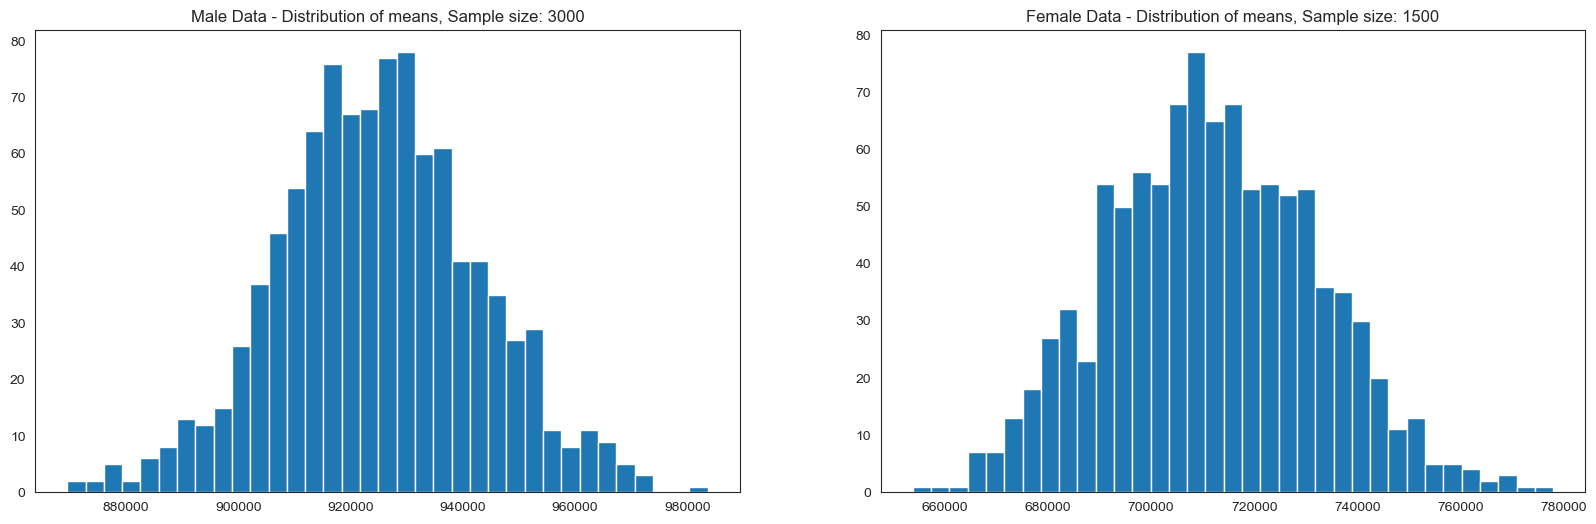

In [339]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male Data - Distribution of means, Sample size: 3000")
axis[1].set_title("Female Data - Distribution of means, Sample size: 1500")

plt.show()

In [340]:
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

Population mean - Mean of sample means of amount spend for Male: 924810.09
Population mean - Mean of sample means of amount spend for Female: 711833.83

Male - Sample mean: 925344.40 Sample std: 985830.10
Female - Sample mean: 712024.39 Sample std: 807370.73


In [341]:
male_margin_of_error_clt = 1.96*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 1.96*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (895617.83, 955070.97)
Female confidence interval of means: (673254.77, 750794.02)


#### Married vs Unmarried

In [342]:
marriage_data = walmart_data.groupby(['User_ID', 'Marital_check'])[['Purchase']].sum()
marriage_data = amt_df.reset_index()
marriage_data

,index,User_ID,Marital_check,Purchase
0,0,1000001,Single,334093
1,1,1000002,Single,810472
2,2,1000003,Single,341635
3,3,1000004,Married,206468
4,4,1000005,Married,821001
...,...,...,...,...
5886,5886,1006036,Married,4116058
5887,5887,1006037,Single,1119538
5888,5888,1006038,Single,90034
5889,5889,1006039,Married,590319


In [343]:
# Gender wise value counts in avg_amt_df
marriage_data['Marital_check'].value_counts()

Single     3417
Married    2474
Name: Marital_check, dtype: int64

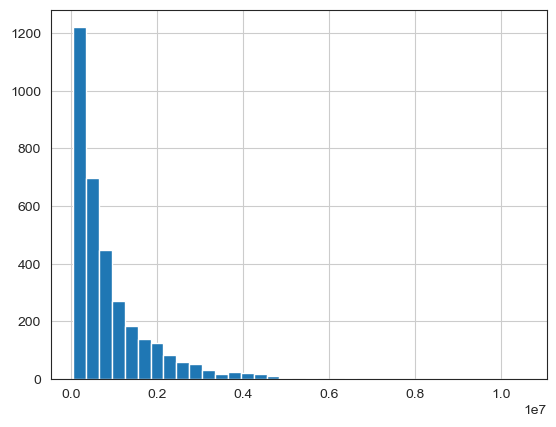

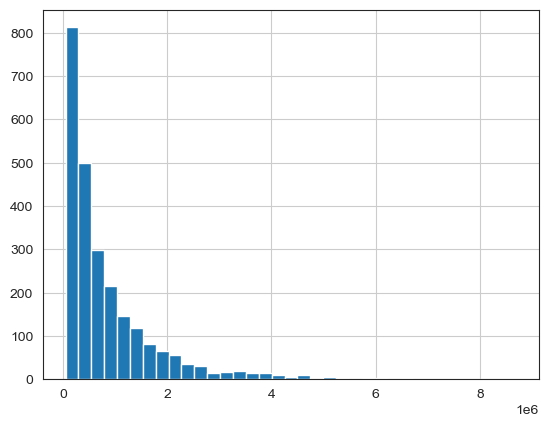

In [344]:
# histogram of average amount spend for each customer - Male & Female
marriage_data[marriage_data['Marital_check']=='Single']['Purchase'].hist(bins=35)
plt.show()

marriage_data[marriage_data['Marital_check']=='Married']['Purchase'].hist(bins=35)
plt.show()

In [345]:
male_avg = marriage_data[marriage_data['Marital_check']=='Single']['Purchase'].mean()
female_avg = marriage_data[marriage_data['Marital_check']=='Married']['Purchase'].mean()

print("Average amount spend by Male customers: {:.2f}".format(male_avg))
print("Average amount spend by Female customers: {:.2f}".format(female_avg))

Average amount spend by Male customers: 880575.78
Average amount spend by Female customers: 843526.80


In [346]:
male_df = marriage_data[marriage_data['Marital_check']=='Single']
female_df = marriage_data[marriage_data['Marital_check']=='Married']

In [347]:
male_sample_size = 3000
female_sample_size = 2000
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()
    
    male_means.append(male_mean)
    female_means.append(female_mean)

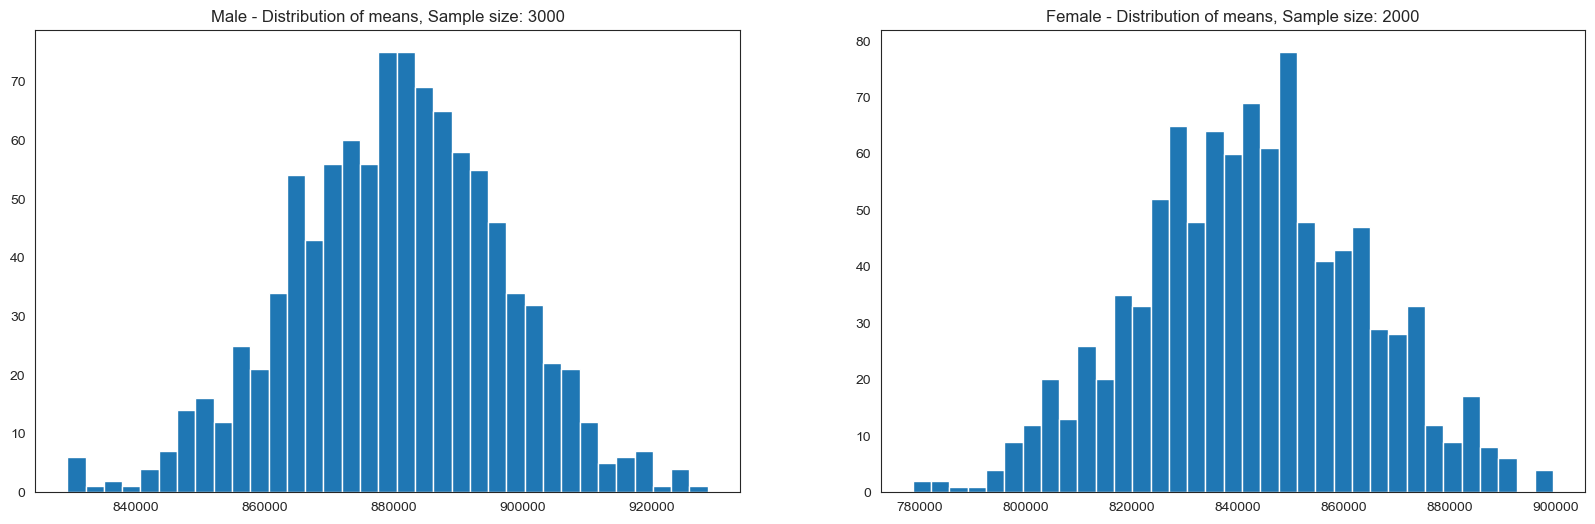

In [348]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 3000")
axis[1].set_title("Female - Distribution of means, Sample size: 2000")

plt.show()

In [349]:
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

Population mean - Mean of sample means of amount spend for Male: 880385.62
Population mean - Mean of sample means of amount spend for Female: 842425.85

Male - Sample mean: 880575.78 Sample std: 949436.25
Female - Sample mean: 843526.80 Sample std: 935352.12


In [350]:
male_margin_of_error_clt = 1.96*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 1.96*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (848741.18, 912410.38)
Female confidence interval of means: (806668.83, 880384.76)


#### Age Group

In [352]:
age_data = walmart_data.groupby(['User_ID', 'Age'])[['Purchase']].sum()
age_data = age_data.reset_index()
age_data

,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000002,55+,810472
2,1000003,26-35,341635
3,1000004,46-50,206468
4,1000005,26-35,821001
...,...,...,...
5886,1006036,26-35,4116058
5887,1006037,46-50,1119538
5888,1006038,55+,90034
5889,1006039,46-50,590319


In [353]:
age_data['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

In [359]:
sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = np.sort(walmart_data['Age'].unique())
for age_interval in age_intervals:
    all_means[age_interval] = []

for age_interval in age_intervals:
    for _ in range(num_repitions):
        mean = age_data[age_data['Age']==age_interval].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[age_interval].append(mean)

In [360]:
for val in age_intervals:
    
    new_df = age_data[age_data['Age']==val] 
    
    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 0-17 --> confidence interval of means: (527662.46, 710073.17)
For age 18-25 --> confidence interval of means: (801632.78, 908093.46)
For age 26-35 --> confidence interval of means: (945034.42, 1034284.21)
For age 36-45 --> confidence interval of means: (823347.80, 935983.62)
For age 46-50 --> confidence interval of means: (713505.63, 871591.93)
For age 51-55 --> confidence interval of means: (692392.43, 834009.42)
For age 55+ --> confidence interval of means: (476948.26, 602446.23)


### Insights

- ~ 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)
- 75% of the users are **`Male`** and 25% are **`Female`**
- 60% Single, 40% Married
- 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
- Total of 20 product categories are there
- There are 20 differnent types of occupations in the city

<br>


- Most of the users are `Male`
- There are 20 different types of `Occupation` and `Product_Category`
- More users belong to `B` `City_Category`
- More users are `Single` as compare to `Married`
- `Product_Category` - `1, 5, 8, & 11` have highest purchasing frequency.

<br>

- **Average amount** spend by **Male** customers: **925344.40**
- **Average amount** spend by **Female** customers: **712024.39**

<br>

#### Confidence Interval by Gender

1. Average amount spend by **male** customers is **9,26,341.86**
2. Average amount spend by **female** customers is **7,11,704.09**

Now we can infer about the population that, **95% of the times**:

1. Average amount spend by **male** customer will lie in between: **(895617.83, 955070.97)**
2. Average amount spend by **female** customer will lie in between: **(673254.77, 750794.02)**


#### Confidence Interval by Marital_Status
1. **Married** confidence interval of means: **(806668.83, 880384.76)**
2. **Unmarried** confidence interval of means: **(848741.18, 912410.38)**


#### Confidence Interval by Age

1. For age 26-35 --> confidence interval of means: **(945034.42, 1034284.21)**
2. For age 36-45 --> confidence interval of means: **(823347.80, 935983.62)**
3. For age 18-25 --> confidence interval of means: **(801632.78, 908093.46)**
4. For age 46-50 --> confidence interval of means: **(713505.63, 871591.93)**
5. For age 51-55 --> confidence interval of means: **(692392.43, 834009.42)**
6. For age 55+ --> confidence interval of means: **(476948.26, 602446.23)**
7. For age 0-17 --> confidence interval of means: **(527662.46, 710073.17)**

### Recommendations

1. Men spent more money than women, So company should focus on retaining the male customers and getting more male customers.
2. **Product_Category - 1, 5, 8, & 11** have highest purchasing frequency. it means these are the products in these categories are liked more by customers. Company can focus on selling more of these products or selling more of the products which are purchased less.
3. **Unmarried** customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.
4. Customers in the **age 18-45** spend more money than the others, So company should focus on acquisition of customers who are in the **age 18-45**
5. Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.